# Data Analysis

NameProject : COVID-19 Dataset


In [66]:
# Load libraries
import pandas as pd # DataFrame
import seaborn as sb # graph


# 1.Data Acquisition

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
covid_data = pd.read_csv('/content/drive/MyDrive/CS240/country_wise_latest.csv')

In [25]:
# View the first 7 rows of the dataset
covid_data.head(7)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas


In [ ]:
# Fetch the dimensions of data
covid_data.shape

(187, 15)

# 2.Data Preparation

In [26]:
# Drop column 'index' (There is no meaning!)
covid_cleaned = covid_data.iloc[:,1:]

In [27]:
covid_cleaned.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# 2.1Checking and handling duplicate data

In [54]:
# Check for duplicate rows
duplicate_rows = covid_cleaned[covid_cleaned.duplicated()]

In [55]:
# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [57]:
 # Display the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, Deaths / 100 Cases, Recovered / 100 Cases, Deaths / 100 Recovered, Confirmed last week, 1 week change, 1 week % increase, WHO Region]
Index: []


In [58]:
# Remove duplicate rows (if any) and keep only the first occurrence
covid_cleaned_no_duplicates = covid_cleaned.drop_duplicates(keep='first')

In [59]:
# Print the new shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", covid_cleaned_no_duplicates.shape)

Shape after removing duplicates: (187, 14)


# 2.2Checking and handling inconsistent Datatypes

In [60]:
# Check data types of each column
print(covid_cleaned_no_duplicates.dtypes)

Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week % increase          float64
WHO Region                category
dtype: object


In [61]:
# Convert 'WHO Region' to category type if it's not already
covid_cleaned_no_duplicates['WHO Region'] = covid_cleaned_no_duplicates['WHO Region'].astype('category')

In [62]:
# Check the data types again to verify the change
print(covid_cleaned_no_duplicates.dtypes)

Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week % increase          float64
WHO Region                category
dtype: object


# 2.3Checking and handling missing data

In [65]:
# Check for missing values in each column
missing_values = covid_cleaned_no_duplicates.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


# 2.3Etc.


In [67]:
import matplotlib.pyplot as plt
# You can perform various other data analysis tasks based on your needs.
# Here are some examples:

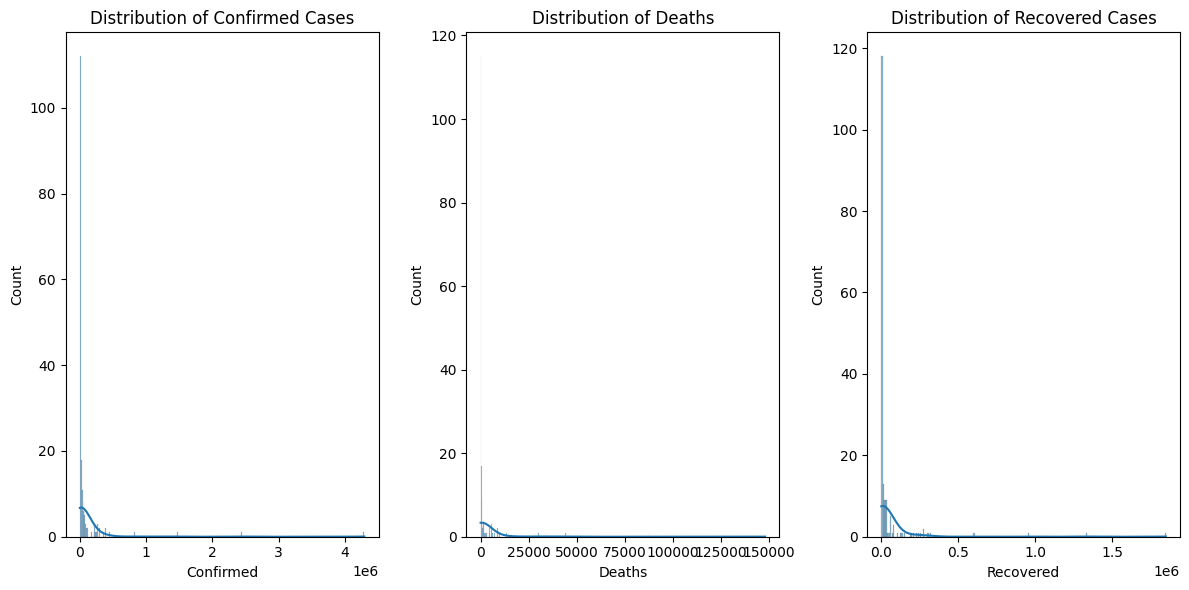

In [68]:
# 1. Explore the distribution of confirmed cases, deaths, and recovered cases using histograms:

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sb.histplot(covid_cleaned_no_duplicates['Confirmed'], kde=True)
plt.title('Distribution of Confirmed Cases')

plt.subplot(1, 3, 2)
sb.histplot(covid_cleaned_no_duplicates['Deaths'], kde=True)
plt.title('Distribution of Deaths')

plt.subplot(1, 3, 3)
sb.histplot(covid_cleaned_no_duplicates['Recovered'], kde=True)
plt.title('Distribution of Recovered Cases')

plt.tight_layout()
plt.show()


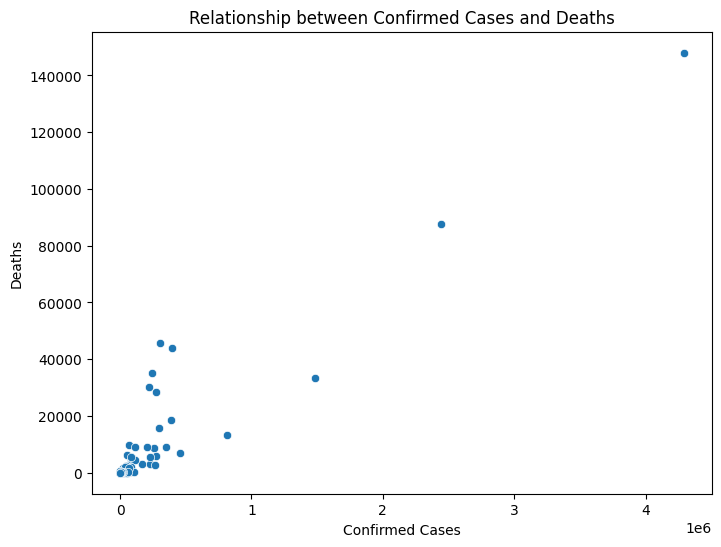

In [69]:
# 2. Analyze the relationship between confirmed cases and deaths using a scatter plot:

plt.figure(figsize=(8, 6))
sb.scatterplot(x='Confirmed', y='Deaths', data=covid_cleaned_no_duplicates)
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

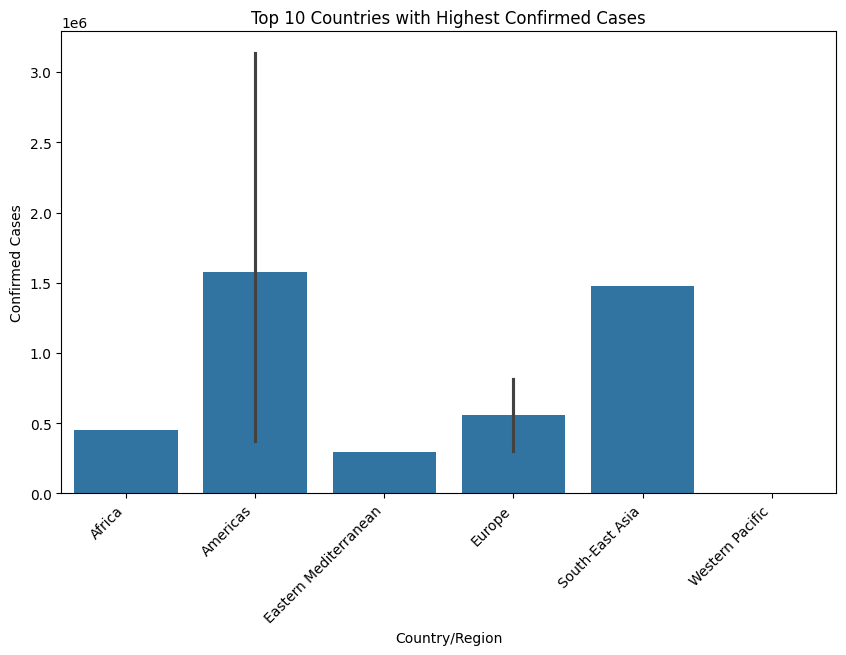

In [76]:
# 3. Explore the top 10 countries with the highest number of confirmed cases:

top_10_confirmed = covid_cleaned_no_duplicates.sort_values('Confirmed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sb.barplot(x='WHO Region', y='Confirmed', data=top_10_confirmed)
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

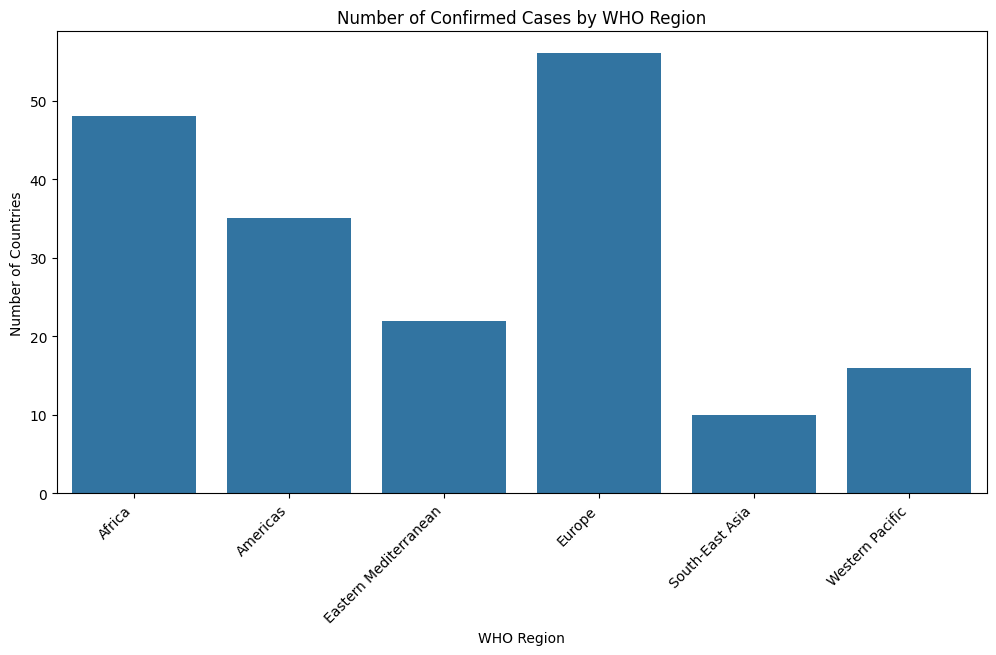

In [71]:
# 4. Analyze the number of confirmed cases by WHO Region using a grouped bar chart:

plt.figure(figsize=(12, 6))
sb.countplot(x='WHO Region', data=covid_cleaned_no_duplicates)
plt.title('Number of Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
# 5. Calculate the correlation between different variables:

correlation_matrix = covid_cleaned_no_duplicates[['Confirmed', 'Deaths', 'Recovered']].corr()
print(correlation_matrix)

           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.934698   0.906377
Deaths      0.934698  1.000000   0.832098
Recovered   0.906377  0.832098   1.000000


# 3.EDA and Data Visualization

In [ ]:
# prompt: how to EDA and Data Visualization

import matplotlib.pyplot as plt
# 1. Summary Statistics
print(covid_cleaned_no_duplicates.describe())  # Basic statistics for numerical columns

# 2. Data Distribution (Histograms)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(covid_cleaned_no_duplicates['Confirmed'], bins=20)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(covid_cleaned_no_duplicates['Deaths'], bins=20)
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(covid_cleaned_no_duplicates['Recovered'], bins=20)
plt.title('Distribution of Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Relationship between variables (Scatter plots)
plt.figure(figsize=(8, 6))
plt.scatter(covid_cleaned_no_duplicates['Confirmed'], covid_cleaned_no_duplicates['Deaths'])
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

# 4. Categorical Variable Analysis (Bar plots or count plots)
plt.figure(figsize=(12, 6))
sb.countplot(x='WHO Region', data=covid_cleaned_no_duplicates)
plt.title('Number of Countries by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Correlation Matrix (Heatmap)
correlation_matrix = covid_cleaned_no_duplicates[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Box plots to identify outliers
plt.figure(figsize=(10, 6))
sb.boxplot(x='WHO Region', y='Confirmed', data=covid_cleaned_no_duplicates)
plt.title('Confirmed Cases by WHO Region')
plt.xticks(rotation=45, ha='right')
plt.show()


# You can explore further by:
# - Creating more complex visualizations like line plots for time series data if you have it.
# - Analyzing the distribution of variables within different groups (e.g., confirmed cases by WHO region).
# - Using interactive visualization libraries like Plotly for more engaging exploration.


In [79]:
# 1. Summary Statistics
print(covid_cleaned_no_duplicates.describe())  # Basic statistics for numerical columns


          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

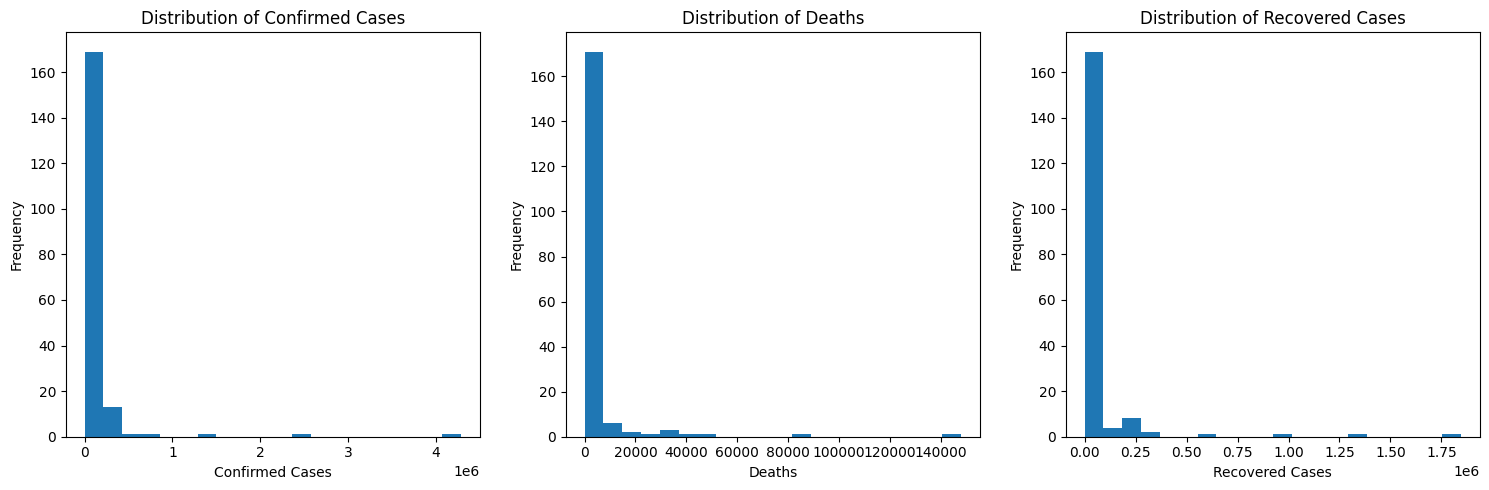

In [85]:
# 2. Data Distribution (Histograms)
plt.figure(figsize=(15, 5))
# Subplot สำหรับการกระจายของผู้ติดเชื้อที่ยืนยัน
plt.subplot(1, 3, 1)
plt.hist(covid_cleaned_no_duplicates['Confirmed'], bins=20)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')

# Subplot สำหรับการกระจายของผู้เสียชีวิต
plt.subplot(1, 3, 2)
plt.hist(covid_cleaned_no_duplicates['Deaths'], bins=20)
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')

# Subplot สำหรับการกระจายของผู้หาย
plt.subplot(1, 3, 3)
plt.hist(covid_cleaned_no_duplicates['Recovered'], bins=20)
plt.title('Distribution of Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
#Histogram จะช่วยให้เราเห็นว่าข้อมูลมีการกระจายตัวอย่างไร เช่น ส่วนไหนมีจำนวนผู้ติดเชื้อสูงสุด หรือการหายจากโรคเป็นอย่างไร

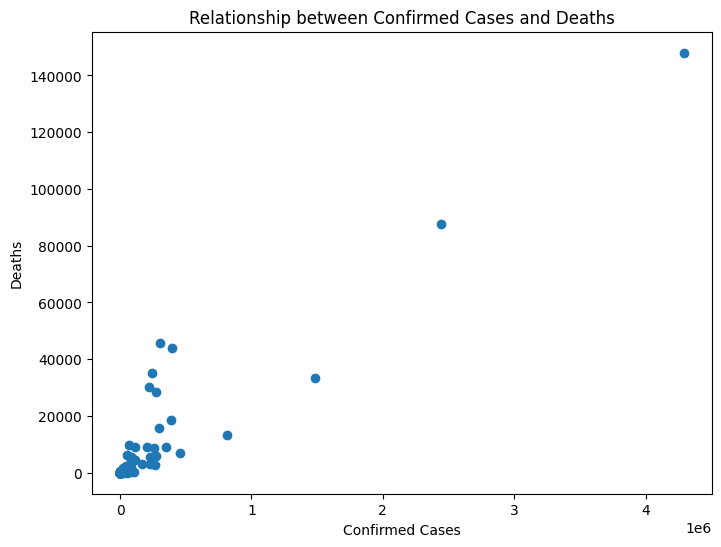

In [86]:
# 3. Relationship between variables (Scatter plots)
plt.figure(figsize=(8, 6))
plt.scatter(covid_cleaned_no_duplicates['Confirmed'], covid_cleaned_no_duplicates['Deaths'])
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()
#Scatter Plot ช่วยให้เรามองเห็นว่ามีความสัมพันธ์ระหว่างจำนวนผู้ติดเชื้อและจำนวนผู้เสียชีวิตหรือไม่ ถ้าจำนวนผู้ติดเชื้อสูงก็อาจจะทำให้จำนวนผู้เสียชีวิตสูงขึ้นด้วย

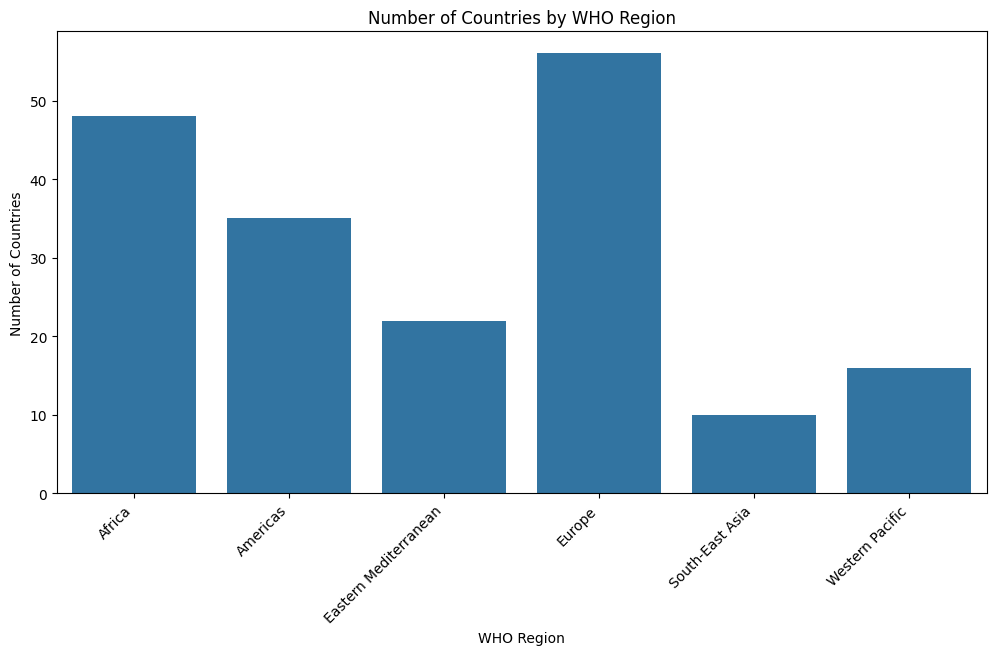

In [87]:
# 4. Categorical Variable Analysis (Bar plots or count plots)
plt.figure(figsize=(12, 6))
sb.countplot(x='WHO Region', data=covid_cleaned_no_duplicates)
plt.title('Number of Countries by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()
#Bar Plot นี้จะแสดงให้เห็นว่ามีจำนวนประเทศในแต่ละภูมิภาคของ WHO อย่างไร ซึ่งสามารถช่วยในการวิเคราะห์ว่าภูมิภาคใดมีประเทศมากที่สุด

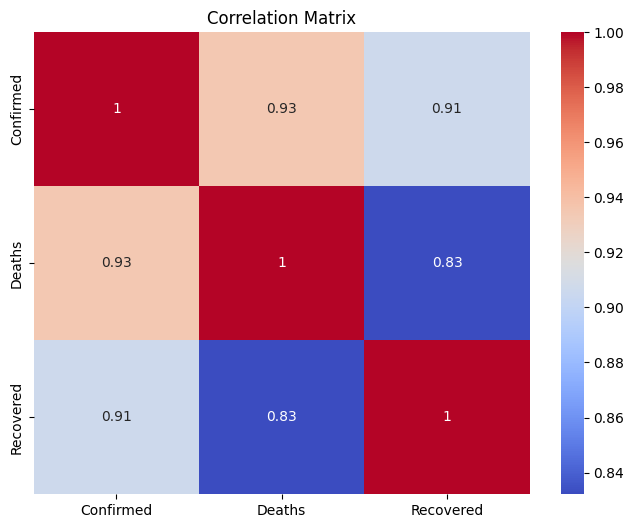

In [88]:
# 5. Correlation Matrix (Heatmap)
correlation_matrix = covid_cleaned_no_duplicates[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#Heatmap จะช่วยให้เราเห็นความสัมพันธ์ระหว่างตัวแปรต่าง ๆ ว่ามีความสัมพันธ์กันมากน้อยแค่ไหน โดยใช้สีเพื่อช่วยในการแยกแยะ

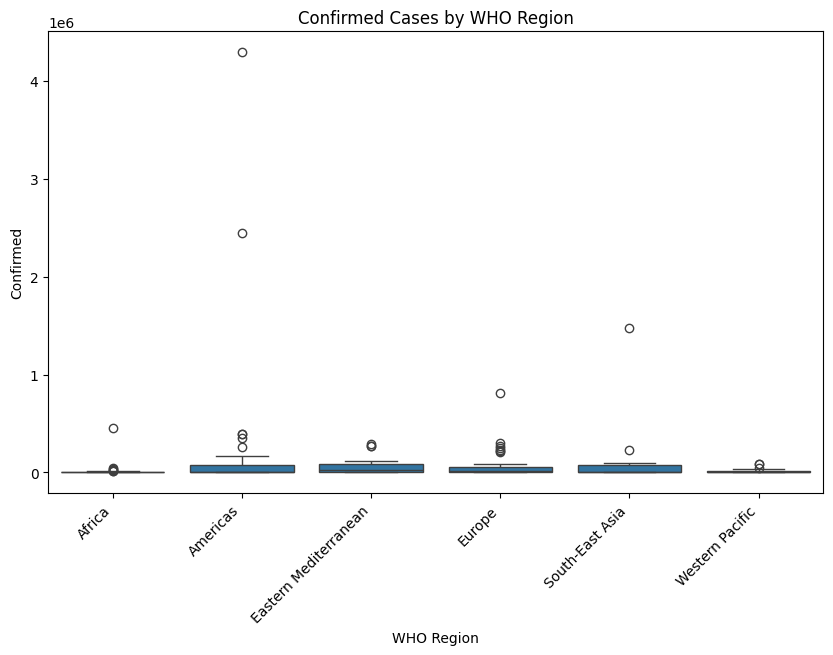

In [89]:
# 6. Box plots to identify outliers
plt.figure(figsize=(10, 6))
sb.boxplot(x='WHO Region', y='Confirmed', data=covid_cleaned_no_duplicates)
plt.title('Confirmed Cases by WHO Region')
plt.xticks(rotation=45, ha='right')
plt.show()
#Box Plot จะช่วยให้เราสามารถมองเห็นค่าผิดปกติได้อย่างชัดเจน รวมถึงข้อมูลเชิงพรรณนา เช่น ค่าต่ำสุด ค่าต่ำกว่าเฉลี่ย ค่ามัธยฐาน และค่าที่สูงสุด

**Name:** Ariya Tangrojanakul

**Number:**6609520108

หนูจำเวลาผิดค่ะ นอบรับความผิดพลาดจำได้ว่าส่ง 23:59